In [1]:
import pandas as pd
import os
import h5py
import numpy as np
from matplotlib import pyplot as plt
import pickle

### Raw Data

In [3]:
os.getcwd()

'/home/sonkerr/rl_prof_exp/jan_26_exp'

In [6]:
# data_dir = "/home/scratch/rsonker/ech/data"
# raw = h5py.File(os.path.join(data_dir, "diiid_data_gas_fix.h5"), "r")
# raw = h5py.File(os.path.join(data_dir, "cakenn_efit_data2.h5"), "r")


data_dir = "/home/sonkerr/rl_prof_exp/cakenn_data"

# zipfit = h5py.File(os.path.join(data_dir, "cakenn_exp.h5"), "r")
cakenn = pickle.load(open(os.path.join(data_dir, "cakenn_profiles_exp25.pkl"), "rb"))
# cakenn_old = pickle.load(open(os.path.join("/zfsauton/project/fusion/data/raw_data", "cakenn_v4_and_scalars.pkl"), "rb"))

In [9]:
cakenn.keys()

dict_keys([203016, 203017, 203018, 203019, 203020, 203021, 203022, 203023, 203024, 203025, 203026, 203027])

In [11]:
print(cakenn[203022].keys())

for k in cakenn[203022].keys():
    print(k, cakenn[203022][k].shape)

dict_keys(['density', 'rotation', 'q', 'pressure', 'etemp'])
density (345, 101)
rotation (345, 101)
q (345, 101)
pressure (345, 101)
etemp (345, 101)


## Rotation profile

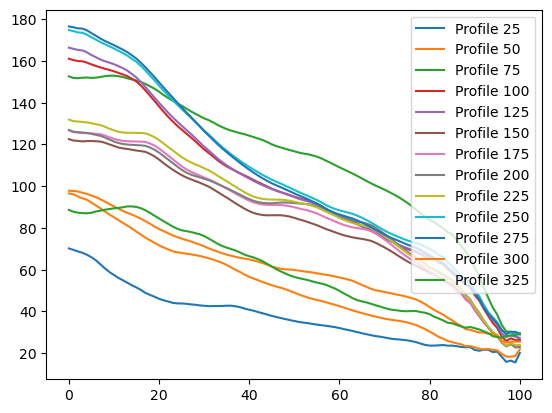

In [14]:
shot = 203022
for i in range(25, 345, 25):
    plt.plot(cakenn[shot]['rotation'][i,:], label=f"Profile {i}")
    plt.legend()

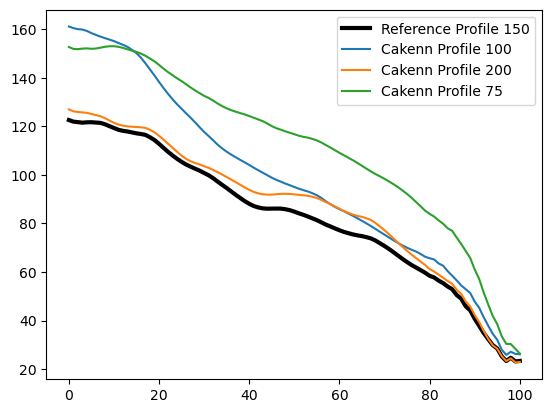

In [ ]:
ref_i = 150
plt.plot(cakenn[shot]['rotation'][ref_i,:], label=f"Reference Profile {ref_i}", linewidth=3, color='k')

i_list = [100,200, 75]
for i in i_list:
    plt.plot(cakenn[shot]['rotation'][i,:], label=f"Cakenn Profile {i}")
    
plt.legend()

In [5]:
def save_profile_to_template(profile, filename, col_name="km/s"):
    """
    Save a profile to a file in the template format.
    
    Parameters:
    -----------
    profile : array-like
        The profile data to save (should be 101 dimensions)
    filename : str
        Output filename (e.g., 'my_profile.txt')
    col_name : str
        Column name header (default: 'eV')
    """
    # Ensure profile is a numpy array
    profile = np.array(profile)
    
    # Generate row names
    row_names = '|'.join([f'row {i}' for i in range(len(profile))])
    
    # Write to file
    with open(filename, 'w') as f:
        # Write column name header
        f.write(f'COL_NAMES=|{col_name}\n')
        
        # Write row names header
        f.write(f'ROW_NAMES=|{row_names}\n')
        
        # Write profile values (one per line with proper formatting)
        for value in profile:
            f.write(f'{value:12.4f}\n')
    
    print(f"Profile saved to {filename}")



In [ ]:
def save_profile_to_template2(rot_profile=None, dens_profile=None, etemp_profile=None, pres_profile=None, filename='profiles.txt', dim = 33):
    """
    Save 4 profiles to a file in matrix format.
    
    Parameters:
    -----------
    rot_profile : array-like, optional
        Rotation profile (should be 33 dimensions). Default is array of 33 zeros.
    dens_profile : array-like, optional
        Density profile (should be 33 dimensions). Default is array of 33 zeros.
    etemp_profile : array-like, optional
        Electron temperature profile (should be 33 dimensions). Default is array of 33 zeros.
    pres_profile : array-like, optional
        Pressure profile (should be 33 dimensions). Default is array of 33 zeros.
    filename : str
        Output filename (e.g., 'my_profiles.txt')
    """
    # Set defaults if not provided
    if rot_profile is None:
        rot_profile = np.zeros(dim)
    if dens_profile is None:
        dens_profile = np.zeros(dim)
    if etemp_profile is None:
        etemp_profile = np.zeros(dim)
    if pres_profile is None:
        pres_profile = np.zeros(dim)
    # Ensure profiles are numpy arrays
    rot_profile = np.array(rot_profile)
    dens_profile = np.array(dens_profile)
    etemp_profile = np.array(etemp_profile)
    pres_profile = np.array(pres_profile)
    
    # Number of columns (assuming 33)
    n_cols = len(rot_profile)
    
    # Generate column names: 'col 0', 'col 1', ..., 'col 32'
    col_names = '|'.join([f'col {i}' for i in range(n_cols)])
    
    # Row names
    row_names = '|'.join(['rot', 'ne', 'te', 'pres'])
    
    # Write to file
    with open(filename, 'w') as f:
        # Write column name header
        f.write(f'COL_NAMES=|{col_names}\n')
        
        # Write row names header
        f.write(f'ROW_NAMES=|{row_names}\n')
        
        # Write each profile as a row
        profiles = [rot_profile, dens_profile, etemp_profile, pres_profile]
        for profile in profiles:
            row_values = ''.join([f'{value:12.2f}' for value in profile])
            f.write(f'{row_values}\n')
    
    print(f"Profiles saved to {filename}")

In [21]:
# Example usage - save the reference profile
shot = '203022'
ref_i = 150
profile_to_save = cakenn[shot]['rot'][ref_i, :]

from scripts.data_cleaning.profile_downsample import robust_downsample
prof_down = robust_downsample(profile_to_save)
print(prof_down.shape)
# Save it
# save_profile_to_template(profile_to_save, 'rot_targets/reference_rotp_75.txt', col_name="km/s")
save_profile_to_template2(rot_profile = prof_down, filename=f'rot_targets/reference_rotp_{ref_i}.txt')


(33,)
Profiles saved to rot_targets/reference_rotp_150.txt


## Differential Rot targets

## Density profile

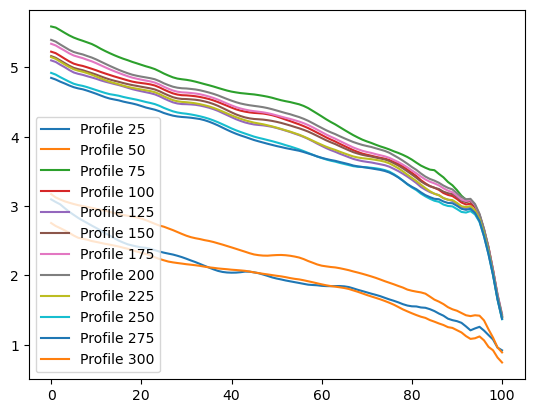

In [17]:
shot = 203019
for i in range(25, 301, 25):
    plt.plot(cakenn[shot]['density'][i,:], label=f"Profile {i}")
    plt.legend()

In [ ]:
for i in range(25, 301, 25):
    plt.plot(cakenn['203019']['dens'][i,:], label=f"Profile {i}")
    plt.legend()

In [ ]:
cakenn

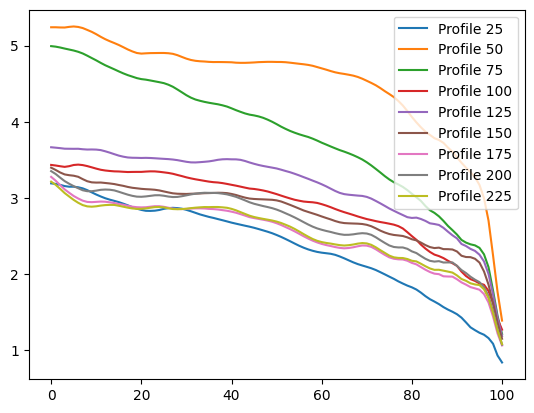

In [21]:
for i in range(25, 250, 25):
    plt.plot(cakenn_old['161416']['ne'][i,:], label=f"Profile {i}")
    plt.legend()

## Temperature

In [23]:
cakenn_old['161416'].keys()

dict_keys(['p', 'q', 'j', 'ne', 'Te', 'Ti', 'Vtor', 'bmspinj', 'bmstinj', 'betan_EFITRT2', 'qmin_EFITRT2', 'ech_pwr_total', 'ip', 'PCBCOIL', 'li_EFITRT2', 'aminor_EFITRT2', 'rmaxis_EFITRT2', 'tribot_EFITRT2', 'tritop_EFITRT2', 'kappa_EFITRT2', 'volume_EFITRT2', 'n1rms', 'n2rms'])

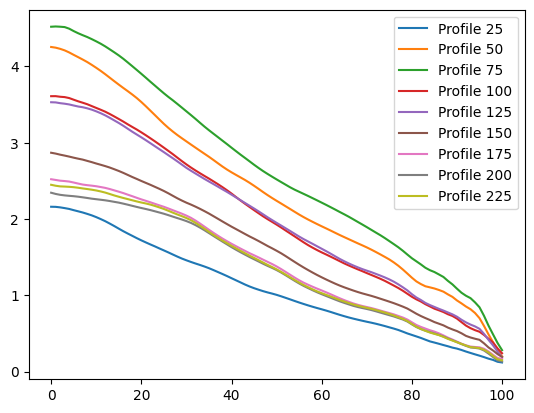

In [24]:
for i in range(25, 250, 25):
    plt.plot(cakenn_old['161416']['Te'][i,:], label=f"Profile {i}")
    plt.legend()